### investigate the fast LLJ
- occurred on 2020-02-07 19:00:00 UTC (12 EST)
- At the VW centroid and swcorner
- 683m, 564m height
- 227 deg nose winddir (SW)
- level 0 LLJ due to low above nose shear (<4m/s)
- high rotor region shear (~12 m/s)
- stable atmospheric conditions (from Obukhov length <1000)
- not a long lasting LLJ event because of the low above nose shear (2, 3 hrs in vwcent, swcorner)
- At 230m, winds started to increase from 16 m/s at 1300, and peaked 6 hours later at 1900 on Feb 7, 2020. Winds were back to ~ 16m/s by around 0800 on feb 8, 2020

From the national weather service: https://www.weather.gov/phi/EventReview20200207

- An area of low pressure began to explosively intensify as it moved over the mid-Atlantic on 7 February 2020, with continued rapid strengthening occurring as the low moved northeast towards the Gulf of Maine. A warm front associated with the low pushed through the mid-Atlantic in the pre-dawn hours of 7 February, while a strong cold front approached by late morning. Ahead of the cold front, an unusually warm winter air mass overspread the mid-Atlantic. A small amount of surface-based instability developed ahead of the cold front. However, exceptionally strong wind fields were present ahead of the rapidly deepening low. Combined with the strong dynamic forcing and lift associated with the low, a line of convection developed over the mid-Atlantic early on 7 February and led to an anomalous wintertime severe weather outbreak. Storms were low topped and produced limited lightning, but acted to transport downward the strong winds present just above the surface. Widespread damaging wind gusts occurred as the storms moved through. In addition, an area of rotation within the squall line produced a brief tornado in Cecil County, MD. A couple of other tornadoes had previously formed further southwest in the WFO Baltimore/Washington CWA. The line of storms produced severe wind gusts all the way to the coast of New Jersey, before rapidly weakening as it moved further northeast and away from the already limited instability.

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import glob
from mycolorpy import colorlist as mcp
import metpy.calc as mpcalc
from metpy.units import units
import sys
sys.path.append('../')
import utils

/projects/daqu2831/Lundquist_research/res_env/lib/python3.10/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
llj = pd.read_csv('../detection2/NWF_vwcorner.csv')
# llj_wf = pd.read_csv('../detection2/CA100_swbuoy_full.csv')
wind = pd.read_csv('../make_wr/swbuoy_wind.csv')

In [51]:
llj.iloc[3829:3848]

,Time,LLJ-classification,Nose windspeed (m/s),Nose height (meters),Wind direction at nose (degrees),Above nose shear (m/s),Above nose shear (1/s),Above nose veer (degrees),Above nose veer (degrees/m),Rotor region shear (m/s),...,Rotor region veer (degrees/m),Surface to nose shear (m/s),Surface to nose shear (1/s),Surface to nose veer (degrees),Surface to nose veer (degrees/m),Surface to top of rotor shear (m/s),Surface to top of rotor shear (1/s),Surface to top of rotor veer (degrees),Surface to top of rotor veer (degrees/m),Obukhov Length (m)
3829,2020-02-07 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3830,2020-02-07 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3831,2020-02-07 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3832,2020-02-07 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3833,2020-02-07 17:00:00,1.0,39.421387,478.952759,221.891876,5.476078,-0.013454,-16.064026,0.039468,13.756420,...,0.054503,23.454426,0.011555,18.371750,0.038765,21.513416,0.021717,14.081192,0.055843,206.793762
3834,2020-02-07 18:00:00,0.0,42.924530,566.990051,230.802979,4.930786,-0.009971,-13.509384,0.027319,13.168411,...,0.026686,26.904543,0.008774,14.700317,0.026157,20.833822,0.019780,6.940903,0.027844,282.728973
3835,2020-02-07 19:00:00,0.0,45.771534,564.989441,227.540558,3.689636,-0.007335,-10.413025,0.020702,12.485237,...,0.025963,29.164333,0.006589,11.514526,0.020561,21.460945,0.014842,6.776611,0.027260,334.402771
3836,2020-02-07 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3837,2020-02-07 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,2020-02-07 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


VWCENT
Time                                                 2020-02-07 19:00:00
LLJ-classification                                                   0.0
Nose windspeed (m/s)                                           45.675568
Nose height (meters)                                          683.231934
Wind direction at nose (degrees)                              227.342209
Above nose shear (m/s)                                          3.799763
Above nose shear (1/s)                                         -0.006028
Above nose veer (degrees)                                     -13.332565
Above nose veer (degrees/m)                                     0.021153
Rotor region shear (m/s)                                       12.340986
Rotor region shear (1/s)                                        0.017394
Rotor region veer (degrees)                                     6.455383
Rotor region veer (degrees/m)                                    0.02955
Surface to nose shear (m/s)                                    29.482876
Surface to nose shear (1/s)                                     0.005602
Surface to nose veer (degrees)                                 14.308426
Surface to nose veer (degrees/m)                                0.021096
Surface to top of rotor shear (m/s)                            21.005966
Surface to top of rotor shear (1/s)                             0.015296
Surface to top of rotor veer (degrees)                           7.63327
Surface to top of rotor veer (degrees/m)                        0.030727
Obukhov Length (m)                                            297.886993
BVF                                         0.01734711238467371 / second

SWCORNER
Time                                        2020-02-07 19:00:00
LLJ-classification                                          0.0
Nose windspeed (m/s)                                  45.771534
Nose height (meters)                                 564.989441
Wind direction at nose (degrees)                     227.540558
Above nose shear (m/s)                                 3.689636
Above nose shear (1/s)                                -0.007335
Above nose veer (degrees)                            -10.413025
Above nose veer (degrees/m)                            0.020702
Rotor region shear (m/s)                              12.485237
Rotor region shear (1/s)                               0.016879
Rotor region veer (degrees)                             5.67511
Rotor region veer (degrees/m)                          0.025963
Surface to nose shear (m/s)                           29.164333
Surface to nose shear (1/s)                            0.006589
Surface to nose veer (degrees)                        11.514526
Surface to nose veer (degrees/m)                       0.020561
Surface to top of rotor shear (m/s)                   21.460945
Surface to top of rotor shear (1/s)                    0.014842
Surface to top of rotor veer (degrees)                 6.776611
Surface to top of rotor veer (degrees/m)                0.02726
Obukhov Length (m)                                   334.402771

### Plot the LLJ over time from 1300 7 feb to 0800 8 feb

In [3]:
def calc_windspeed(ds):
    '''Calculate the wind speed using U and V'''
    U = utils.destagger(ds.U, 3)
    U = U.rename({'west_east_stag': 'west_east'})
    V = utils.destagger(ds.V, 2)
    V = V.rename({'south_north_stag': 'south_north'})
    wspd = np.sqrt((U**2)+(V**2))
    
    return wspd

In [4]:
def get_hgt_arr(ds, lat_idx=200, lon_idx=200):
    '''Returns an array of heights at a given location'''
    PH = utils.destagger(ds['PH'], 1)
    PH = PH.rename({'bottom_top_stag': 'bottom_top'})
    PH = PH.sel(south_north=lat_idx, west_east=lon_idx)

    PHB = utils.destagger(ds['PHB'], 1)
    PHB = PHB.rename({'bottom_top_stag': 'bottom_top'})
    PHB = PHB.sel(south_north=lat_idx, west_east=lon_idx)

    HGT = ds.HGT.sel(south_north=lat_idx, west_east=lon_idx)
    z = np.array((PH+PHB)/9.81-HGT)
    
    return z

In [5]:
# Directory with wrfouts - 09-12 for 2019, 01-08 for 2020
nwf_data_dir_2019 = f"/pl/active/JKL_REAL/N_Atl/reruns_Beiter/wrfouts/nwf/2019/"
nwf_data_dir_2020 = f"/pl/active/JKL_REAL/N_Atl/reruns_Beiter/wrfouts/nwf/2020/"

# Select data from the entire year in domain 2
nwf_2019 = []
for i in range(9, 13):
    nwf_2019 = nwf_2019 + sorted([f for f in glob.glob(nwf_data_dir_2019+f"/{i:02}/wrfout_d02_2019-*")])
nwf_2020 = []
for i in range(1, 9):
    nwf_2020 = nwf_2020 + sorted([f for f in glob.glob(nwf_data_dir_2020+f"/{i:02}/wrfout_d02_2020-*")])
nwf_files_all = sorted(nwf_2019 + nwf_2020)
nwf_files_all = nwf_files_all[::6]  # hourly data

In [6]:
nwf_files = nwf_files_all[3829:3849]

In [7]:
ds = xr.open_mfdataset(nwf_files, 
                       concat_dim = 'Time',
                       combine = 'nested',
                       parallel = True,
                       engine = 'netcdf4',
                       chunks = {'Time':1})

In [8]:
# Find index of lat lon values  40.95N, -70.59E
lats   = ds['XLAT'] 
lons   = ds['XLONG']
lon_vals = lons.sel(Time=0)
lat_vals = lats.sel(Time=0)
lon_idx = utils.find_lat_lon_idx(lon_vals, lat_vals, lon=-70.59, lat=40.95)[1]
lat_idx = utils.find_lat_lon_idx(lon_vals, lat_vals, lon=-70.59, lat=40.95)[0]

In [10]:
wspd = calc_windspeed(ds).isel(south_north=lat_idx, west_east=lon_idx)
z = get_hgt_arr(ds)

In [11]:
z.shape

(20, 53)

In [12]:
U = utils.destagger(ds.U, 3)
U = U.rename({'west_east_stag': 'west_east'})
V = utils.destagger(ds.V, 2)
V = V.rename({'south_north_stag': 'south_north'})

U = U.sel(south_north=lat_idx, west_east=lon_idx)
V = V.sel(south_north=lat_idx, west_east=lon_idx)

wdir = mpcalc.wind_direction(U.values*units('m/s'), V.values*units('m/s'))

In [13]:
times_str = ds.XTIME.dt.strftime("%m-%d %H:%M").values

In [27]:
colors = mcp.gen_color(cmap="magma", n=20)

In [83]:
wdir.magnitude.shape

(20, 53)

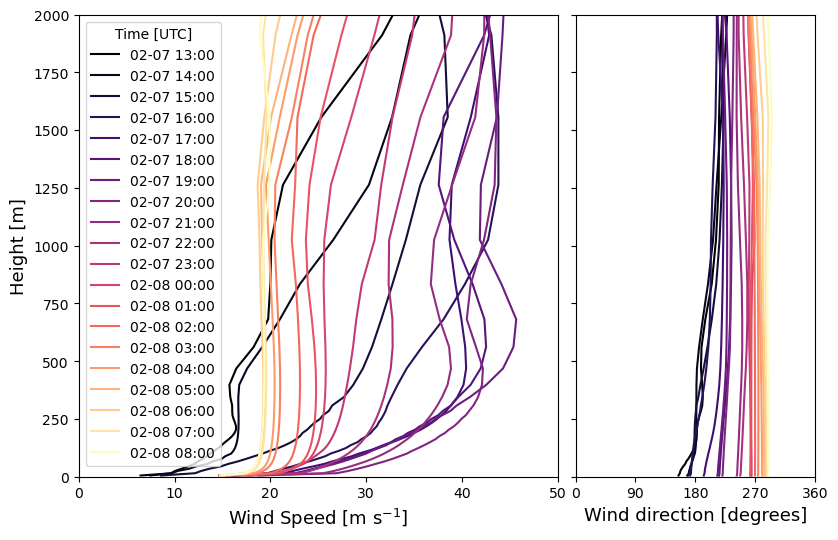

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9.5, 6), gridspec_kw={'width_ratios': [2, 1]}, sharey=True)
ax0 = axs[0]
ax1 = axs[1]

for t in range(len(times_str)):
    ax0.plot(wspd.isel(Time=t).values, z[0], label=times_str[t], color=colors[t])

ax0.set_ylim(0, 2000)
ax0.set_xlim(0, 50)
ax0.legend(title='Time [UTC]')
ax0.set_xlabel('Wind Speed [m s$^{-1}$]', fontsize=13)
ax0.set_ylabel('Height [m]', fontsize=13)


for t in range(len(times_str)):
    ax1.plot(wdir.magnitude[t], z[0], color=colors[t])

ax1.set_xlim(0, 360)
ax1.set_xlabel("Wind direction [degrees]", fontsize=13)
ax1.set_xticks([0, 90, 180, 270, 360])

plt.subplots_adjust(wspace=0.05, hspace=0)

plt.savefig('../output_plots/paper_plots/case_panel.png', bbox_inches='tight')

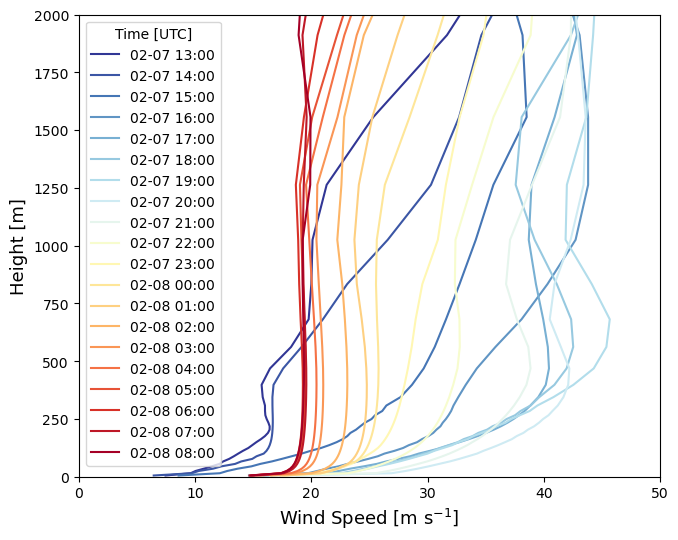

In [74]:
# now make the plot
plt.figure(figsize=(7.5, 6))
ax = plt.gca()

for t in range(len(times_str)):
    ax.plot(wspd.isel(Time=t).values, z[0], label=times_str[t], color=colors[t])

ax.set_ylim(0, 2000)
ax.set_xlim(0, 50)
ax.legend(title='Time [UTC]')
ax.set_xlabel('Wind Speed [m s$^{-1}$]', fontsize=13)
ax.set_ylabel('Height [m]', fontsize=13)

plt.savefig('../output_plots/paper_plots/case_profile.png', bbox_inches='tight')

In [52]:
times_str[6]

'02-07 19:00'

(0.0, 2000.0)

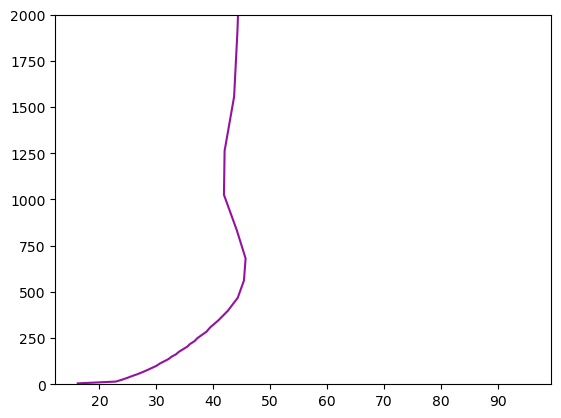

In [55]:
plt.plot(wspd.isel(Time=6).values, z[0], label=times_str[6], color=colors[6])
plt.ylim(0, 2000)